# World Development Indicators

### Descripción de datos:
Los datos elegidos son indicadores de desarrollo de países de todo el mundo compilados a partir de fuentes internacionales oficialmente reconocidas.


Con las siguientes líneas analizaremos nuestra base de datos.


In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error



In [3]:
import itertools
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("Indicators.csv")

In [5]:
df.shape

(5656458, 6)

In [6]:
df.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [7]:
df.dtypes

CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year               int64
Value            float64
dtype: object

In [8]:
df.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

### Justificación de los datos: 
a)	Los datos para trabajar fueron de nuestro interés ya que están relacionados con aspectos de todo nuestro entorno en diferentes conjuntos de áreas como economía y demografía en las cuales podemos aplicar los conocimientos previamente obtenidos. 


b)	El beneficio para nosotros es ya que nuestros conocimientos nos permiten entender y analizar todos estos factores de una manera óptima y al mismo tiempo poder aplicar de una manera muy práctica todo lo que estamos aprendiendo en nuestra carrera.  


### Objetivos

Objetivo principal: Revisar que factores afectan principalmente la mortalidad infantil. Objetivos secundarios: Analizar un país y cómo ha sido afectado a lo largo del tiempo por sus relaciones con una, o varias, potencias.


### DESARROLLO DE HERRAMIENTAS
1.Limpieza de datos


### b)	Agrupamos los datos por la columna “CountryCode”, en donde por cada archivo agrupado, seleccionamos los grupos de países de una manera estratégica en busca de no repetir ningún dato. 
•	Mundo árabe, 

•	África central y Norte

•	Este de Asia y Pacífico

•	Europa y Asia Central

•	América Latina y Caribe

•	Norteamérica

•	Sur de Asia

•	África y SubSahara


In [9]:
ARB= df[df['CountryCode']=='ARB']
ARB.to_csv('Solo_Mundo_Arabe.csv', index=False)

MEA= df[df['CountryCode']=='MEA']
MEA.to_csv('Solo_Africa_CentralyNorte.csv', index=False)

EAS= df[df['CountryCode']=='EAS']
EAS.to_csv('Solo_EstedeAsia_Pacífico.csv', index=False)

ECS= df[df['CountryCode']=='ECS']
ECS.to_csv('Solo_Europa_AsiaCentral.csv', index=False)

LCN= df[df['CountryCode']=='LCN']
LCN.to_csv('Solo_AmericaLatina_Caribe.csv', index=False)

NAC= df[df['CountryCode']=='NAC']
NAC.to_csv('Solo_NorteAmerica.csv', index=False)

SAS= df[df['CountryCode']=='SAS']
SAS.to_csv('Solo_SurAsia.csv', index=False)

SSF= df[df['CountryCode']=='SSF']
SSF.to_csv('Solo_Africa_SubSahara.csv', index=False)

Posteriormente toda esta información la guardaremos en un data frame con el cual trabajaremos durante todo el proyecto donde ya cuenta con toda la información requerida para la búsqueda de nuestros objetivos finales, donde nuestro indicador principal es el de mortalidad infantil

In [10]:
WORLD=pd.concat([ARB,MEA,EAS,ECS,LCN,NAC,SAS,SSF], ignore_index=True)
WORLD.to_csv('WORLD_GROUPS.csv', index=False)

In [11]:
WORLD_MINF= WORLD[WORLD['IndicatorCode']=='SP.DYN.IMRT.IN']
WORLD_MINF.to_csv('Completa_Mortalidad_Infantil.csv', index=False)
WORLD_MINF

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
52,Arab World,ARB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1960,159.950234
138,Arab World,ARB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1961,155.313614
231,Arab World,ARB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1962,152.233048
327,Arab World,ARB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1963,156.521984
425,Arab World,ARB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1964,152.166551
...,...,...,...,...,...,...
163989,Sub-Saharan Africa (all income levels),SSF,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2011,63.695070
164577,Sub-Saharan Africa (all income levels),SSF,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2012,61.540075
165119,Sub-Saharan Africa (all income levels),SSF,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2013,59.706947
165524,Sub-Saharan Africa (all income levels),SSF,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2014,57.932412


Con las siguientes líneas analizaremos nuestra base de datos

In [12]:
WORLD_MINF.shape

(421, 6)

In [13]:
WORLD_MINF.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [14]:
WORLD_MINF.dtypes

CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year               int64
Value            float64
dtype: object

In [15]:
WORLD_MINF.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

## 2. Estadística básica de los datos
Ya que nuestro objetivo es analizar como se relaciona el indicador de Mortalidad infantil con el resto de los indicadores, iniciaremos con los datos estadísticos de este. 


In [16]:
means = WORLD_MINF.groupby('CountryName')['Value'].mean()
means

CountryName
Arab World                                         79.121216
East Asia & Pacific (all income levels)            41.349115
Europe & Central Asia (all income levels)          24.773001
Latin America & Caribbean (all income levels)      53.889980
Middle East & North Africa (all income levels)     71.417626
North America                                      12.237646
South Asia                                        100.666071
Sub-Saharan Africa (all income levels)            105.140271
Name: Value, dtype: float64

In [17]:
WORLD_MINF.groupby('CountryName')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
CountryName,,,,,,,,
Arab World,56.0,79.121216,42.932262,27.983485,42.566856,63.044832,117.029598,159.950234
East Asia & Pacific (all income levels),47.0,41.349115,18.277200,14.184070,26.288861,41.567465,52.167207,81.548376
Europe & Central Asia (all income levels),46.0,24.773001,9.976959,9.666805,15.581026,24.810901,33.880122,41.366800
Latin America & Caribbean (all income levels),56.0,53.889980,31.580953,15.221667,24.914480,47.399919,79.113631,120.531796
Middle East & North Africa (all income levels),54.0,71.417626,46.260888,19.659279,31.878673,53.405701,109.866293,161.976583
North America,56.0,12.237646,6.430894,5.486030,6.847809,9.855692,16.740162,26.084210
South Asia,56.0,100.666071,38.924446,41.900000,66.050000,97.750000,135.525000,168.000000
Sub-Saharan Africa (all income levels),50.0,105.140271,26.382057,56.353473,86.341860,108.115504,121.956126,152.967452


In [18]:
WORLD_MINF.groupby('CountryName').corr()

Year     Value
CountryName                                                             
Arab World                                     Year   1.000000 -0.971165
                                               Value -0.971165  1.000000
East Asia & Pacific (all income levels)        Year   1.000000 -0.985560
                                               Value -0.985560  1.000000
Europe & Central Asia (all income levels)      Year   1.000000 -0.997587
                                               Value -0.997587  1.000000
Latin America & Caribbean (all income levels)  Year   1.000000 -0.981992
                                               Value -0.981992  1.000000
Middle East & North Africa (all income levels) Year   1.000000 -0.963363
                                               Value -0.963363  1.000000
North America                                  Year   1.000000 -0.941465
                                               Value -0.941465  1.000000
South Asia                                     Year   1.000000 -0.997959
                                               Value -0.997959  1.000000
Sub-Saharan Africa (all income levels)         Year   1.000000 -0.987426
                                               Value -0.987426  1.000000

In [19]:
WORLD_MINF.groupby('CountryName').cov()

Year        Value
CountryName                                                                  
Arab World                                     Year   266.000000  -680.013340
                                               Value -680.013340  1843.179098
East Asia & Pacific (all income levels)        Year   188.000000  -246.985640
                                               Value -246.985640   334.056039
Europe & Central Asia (all income levels)      Year   180.166667  -133.593791
                                               Value -133.593791    99.539710
Latin America & Caribbean (all income levels)  Year   266.000000  -505.794328
                                               Value -505.794328   997.356580
Middle East & North Africa (all income levels) Year   247.500000  -701.118743
                                               Value -701.118743  2140.069788
North America                                  Year   266.000000   -98.745231
                                               Value  -98.745231    41.356396
South Asia                                     Year   266.000000  -633.542727
                                               Value -633.542727  1515.112464
Sub-Saharan Africa (all income levels)         Year   212.500000  -379.745439
                                               Value -379.745439   696.012951

Observando los datos obtenidos sobre las diferentes regiones a trabajar y analizar, notamos la comparación de cada uno de ellos en sus máximos, mínimos y diferentes porcentajes debido al desarrollo que han tenido a lo largo del tiempo (1960-2015) y debido a las diferentes situaciones que se han presentado. Los promedios obtenidos nos indican la media de muertes infantiles a lo largo del periodo analizado. Como podemos ver Asia Sur se posiciona como el numero 1 seguido del Norte de África, el cual es nuestro indicador principal y vemos como los porcentajes se relacionan con su media, así como la media es alta sus porcentajes también lo son, por lo que podemos decir que van de la mano. 

## 3.Graficas 

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

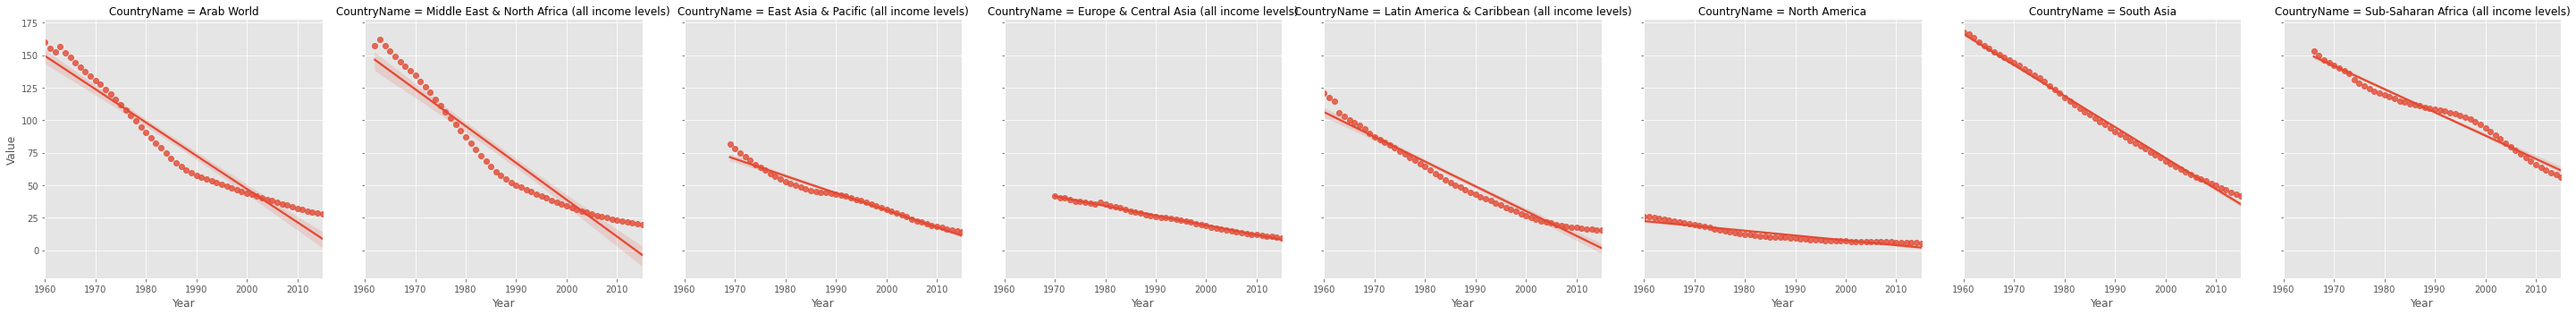

In [21]:
sns.lmplot(x="Year", y="Value", data=WORLD_MINF,col="CountryName")

Realizando las regresiones lineales de los diferentes lugares entre el tiempo y el valor del indicador de mortalidad, nos arrojan  de manera visual una relación lineal entre ellos y esto nos indica que a través del tiempo y de la historia tanto política como económica de estos, han ido cambiando o manteniéndose un desarrollo estable o mejor. Por tanto revisamos como en el tiempo si se ha ido disminuyendo bastante bien la mortalidad infantil.

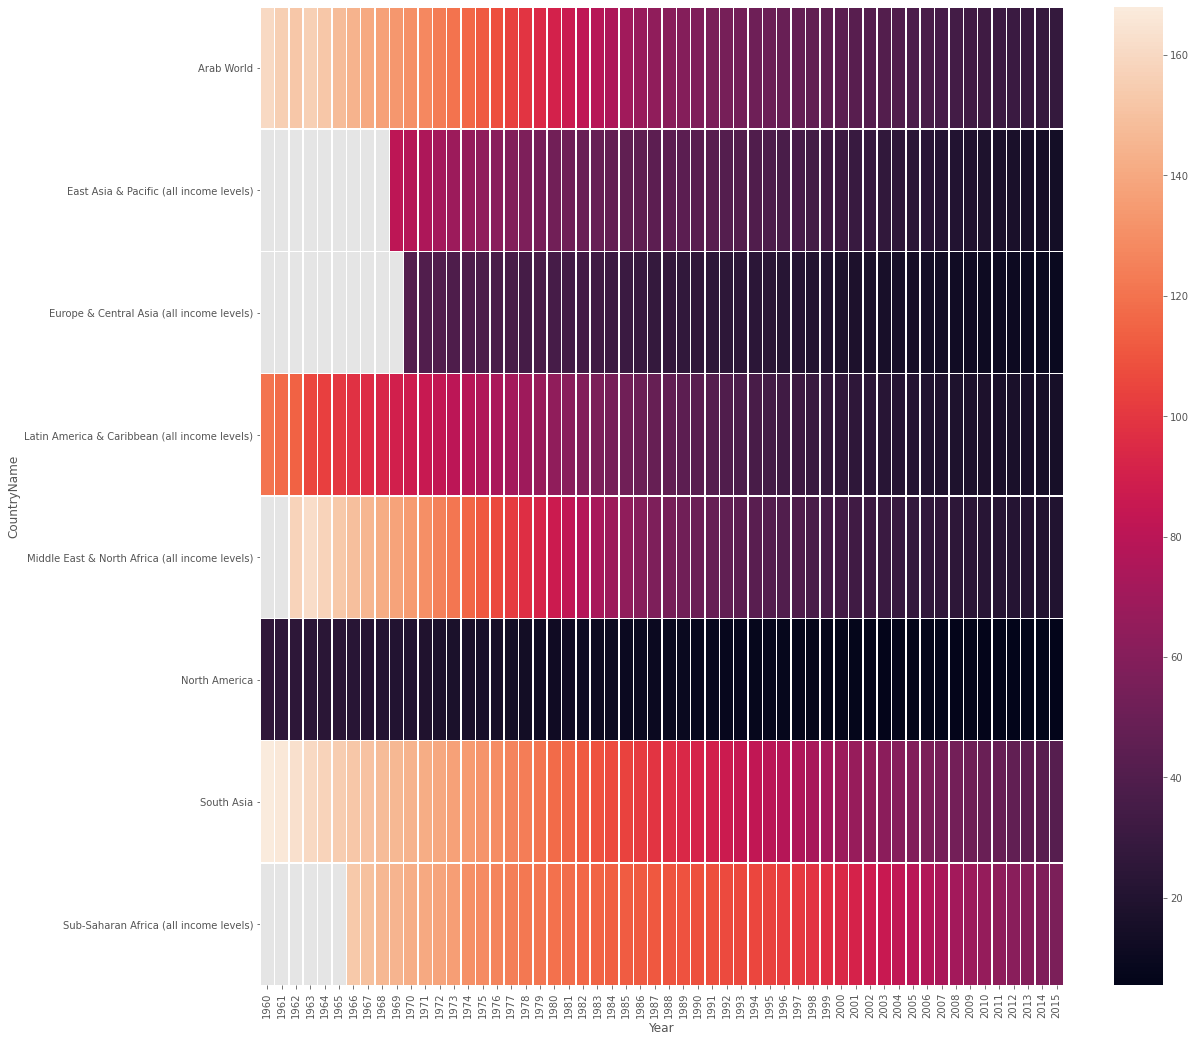

In [22]:
flights_long = WORLD_MINF
flights = flights_long.pivot("CountryName", "Year", "Value")

f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(flights, annot=False, linewidths=.5, ax=ax)

Con este mapa de tiempo entre los lugares con el indicador de mortalidad de interés, nos damos cuenta de que según el color ha sido el avance en ellos, siendo el color más claro un desarrollo bajo mientras que el obscuro arroja uno mejor, y como lo mencionamos anteriormente, aquí podemos observar de una mejor manera que estos lugares han tendido ha contar con un mejor desarrollo según sea el caso.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

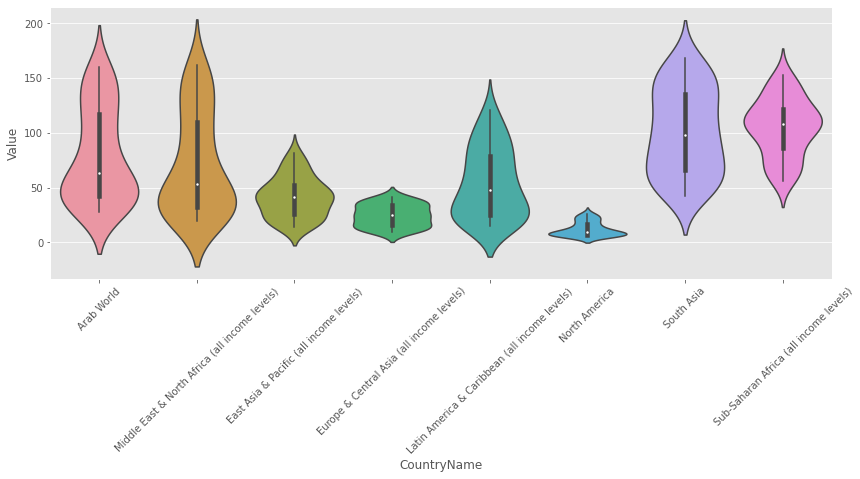

In [23]:
f, ax = plt.subplots(figsize=(14, 5))
g=sns.violinplot( x='CountryName',y='Value', data=WORLD_MINF,scale="width",ax=ax)
plt.xticks(rotation=45)

Con el gráfico anterior podemos ver como el valor de su índice de mortalidad en cada región se ha distribuido conforme han pasado los años, vemos que en paises como Norte América siempre ha sido muy bajo su índice de mortalidad, lo que nos indica que no ha habido una diferencia muy notable, pero que se ha mantenido conforme los años pasan.

#### En esta parte se creará la base de datos de con los indicadores de interés y se categorizarán por país

In [24]:
WORLD_IND_TOT= WORLD.loc[ (WORLD['IndicatorCode']=='SP.DYN.IMRT.IN')| (WORLD['IndicatorCode']=='SP.DYN.AMRT.FE')| (WORLD['IndicatorCode']=='SP.DYN.AMRT.MA') | (WORLD['IndicatorCode']=='NY.GNP.PCAP.CD')| (WORLD['IndicatorCode']=='SP.DYN.TFRT.IN') | (WORLD['IndicatorCode']=='SH.H2O.SAFE.ZS' ) | (WORLD['IndicatorCode']=='SH.STA.ACSN' ) | (WORLD['IndicatorCode']=='SE.SEC.ENRL.FE.ZS' ) | (WORLD['IndicatorCode']=='SH.XPD.PCAP' )  ]
WORLD_IND_TOT.to_csv('WORLD_INDICADORES_INTERES.csv', index=False)

F_ARB=WORLD_IND_TOT[WORLD_IND_TOT['CountryCode']=="ARB"]
F_ARB.to_csv('F_ARB.csv', index=False)

F_MEA=WORLD_IND_TOT[WORLD_IND_TOT['CountryCode']=="MEA"]
F_MEA.to_csv('F_MEA.csv', index=False)

F_LCN=WORLD_IND_TOT[WORLD_IND_TOT['CountryCode']=="LCN"]
F_LCN.to_csv('F_LCN.csv', index=False)

F_SAS=WORLD_IND_TOT[WORLD_IND_TOT['CountryCode']=="SAS"]
F_SAS.to_csv('F_SAS.csv', index=False)

F_SSF=WORLD_IND_TOT[WORLD_IND_TOT['CountryCode']=="SSF"]
F_SSF.to_csv('F_SSF.csv', index=False)


#### Una vez realizado, se utiliza la función de pivot para poder cambiar la forma de la tabla y así poder realizar de una manera óptima las regresiones lineales y análisis estadístico

In [25]:
F_ARB.drop(["CountryName","CountryCode","IndicatorName"],axis=1)
Reg_ARB=F_ARB.pivot("Year","IndicatorCode","Value")
Reg_ARB=Reg_ARB.fillna(0)
Reg_ARB.to_csv('REG_ARB.csv', index=False)

F_MEA.drop(["CountryName","CountryCode","IndicatorName"],axis=1)
Reg_MEA=F_MEA.pivot("Year","IndicatorCode","Value")
Reg_MEA=Reg_MEA.fillna(0)
Reg_MEA.to_csv('REG_MEA.csv', index=False)

F_LCN.drop(["CountryName","CountryCode","IndicatorName"],axis=1)
Reg_LCN=F_LCN.pivot("Year","IndicatorCode","Value")
Reg_LCN=Reg_LCN.fillna(0)
Reg_LCN.to_csv('REG_LCN.csv', index=False)

F_SAS.drop(["CountryName","CountryCode","IndicatorName"],axis=1)
Reg_SAS=F_SAS.pivot("Year","IndicatorCode","Value")
Reg_SAS=Reg_SAS.fillna(0)
Reg_SAS.to_csv('REG_SAS.csv', index=False)

F_SSF.drop(["CountryName","CountryCode","IndicatorName"],axis=1)
Reg_SSF=F_SSF.pivot("Year","IndicatorCode","Value")
Reg_SSF=Reg_SSF.fillna(0)
Reg_SSF.to_csv('REG_SSF.csv', index=False)
print("La tabla para la regresión para Africa del Sub-Sahara")
Reg_SSF

La tabla para la regresión para Africa del Sub-Sahara


IndicatorCode,NY.GNP.PCAP.CD,SE.SEC.ENRL.FE.ZS,SH.H2O.SAFE.ZS,SH.STA.ACSN,SH.XPD.PCAP,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.IMRT.IN,SP.DYN.TFRT.IN
Year,,,,,,,,,
1960,0.000000,0.000000,0.000000,0.000000,0.000000,431.503023,491.256816,0.000000,6.620044
1961,0.000000,0.000000,0.000000,0.000000,0.000000,426.327367,486.186433,0.000000,6.631641
1962,136.261116,0.000000,0.000000,0.000000,0.000000,421.129602,481.092276,0.000000,6.641729
1963,146.564507,0.000000,0.000000,0.000000,0.000000,416.623468,476.591955,0.000000,6.650392
1964,149.156546,0.000000,0.000000,0.000000,0.000000,412.125471,472.103788,0.000000,6.657375
1965,157.479210,0.000000,0.000000,0.000000,0.000000,407.634962,467.628703,0.000000,6.664020
1966,161.470763,0.000000,0.000000,0.000000,0.000000,403.107893,463.131942,152.967452,6.671591
1967,164.526557,0.000000,0.000000,0.000000,0.000000,398.591970,458.651725,149.997585,6.681839
1968,170.610522,0.000000,0.000000,0.000000,0.000000,393.805087,453.890663,146.160944,6.695073


## Regresión para el mundo arabe

In [26]:
REG_ARB_95_13=Reg_ARB
REG_ARB_95_13=REG_ARB_95_13[REG_ARB_95_13.index<2014 ]
REG_ARB_95_13=REG_ARB_95_13[REG_ARB_95_13.index>1994 ]
REG_ARB_95_13['Year']=REG_ARB_95_13.index #esto es para poder usarlo en la regresión
REG_ARB_95_13.rename(columns = {'SP.DYN.TFRT.IN':'FERT', 'SP.DYN.IMRT.IN':'MORTINF', 'SH.STA.ACSN':'DREN','Year':'Año','SH.H2O.SAFE.ZS':'H2O','SP.DYN.AMRT.FE':'MORTFEM','SP.DYN.AMRT.MA':'MORTFMAS','NY.GNP.PCAP.CD':'ING','SE.SEC.ENRL.FE.ZS':'SECFEM','SH.XPD.PCAP':'SALUD',}, inplace = True)
REG_ARB_95_13

IndicatorCode,ING,SECFEM,H2O,DREN,SALUD,MORTFEM,MORTFMAS,MORTINF,FERT,Año
Year,,,,,,,,,,
1995,2115.002961,44.120941,82.248575,68.847629,87.437404,154.293259,207.818727,50.471779,4.409223,1995
1996,2218.507514,44.274078,82.331088,69.441229,86.015232,151.861361,205.029595,49.160410,4.265403,1996
1997,2292.792347,44.615639,82.349999,70.136584,91.292320,149.441004,202.241307,47.867454,4.131459,1997
1998,2281.002184,45.148540,82.421177,70.924500,92.744073,147.694362,199.918746,46.590171,4.006614,1998
1999,2265.740413,45.668999,82.479368,71.572571,100.985407,145.970146,197.616998,45.351754,3.893414,1999
2000,2367.051275,45.947182,82.553412,72.218602,108.030194,144.277579,195.331487,44.100931,3.797743,2000
2001,2450.486899,46.107681,82.610710,72.896324,111.062437,142.612746,192.959397,42.872273,3.712813,2001
2002,2445.429185,46.446621,82.899630,73.514362,111.573857,140.955928,190.563510,41.650605,3.638362,2002
2003,2618.771976,46.708851,82.969976,74.150323,115.986756,139.041076,188.878485,40.459230,3.578167,2003


In [27]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [28]:
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = REG_ARB_95_13['MORTINF']
X = REG_ARB_95_13.drop(['MORTINF'],axis=1)
k = 9
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

<ipython-input-28-179c0769e55e>:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


In [29]:
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_max.head(9))

,numb_features,RSS,R_squared,features
8,1,1.080542,0.998644,"(Año,)"
23,2,0.215918,0.999729,"(SECFEM, Año)"
108,3,0.021073,0.999974,"(H2O, FERT, Año)"
229,4,0.010709,0.999987,"(H2O, DREN, FERT, Año)"
364,5,0.007494,0.999991,"(H2O, DREN, SALUD, MORTFMAS, Año)"
445,6,0.005805,0.999993,"(SECFEM, H2O, DREN, MORTFEM, FERT, Año)"
497,7,0.005216,0.999993,"(SECFEM, H2O, DREN, MORTFEM, MORTFMAS, FERT, Año)"
509,8,0.004420,0.999994,"(SECFEM, H2O, DREN, SALUD, MORTFEM, MORTFMAS, ..."
510,9,0.004303,0.999995,"(ING, SECFEM, H2O, DREN, SALUD, MORTFEM, MORTF..."


In [30]:
x4=REG_ARB_95_13[['FERT','Año','DREN','H2O']]
y4=REG_ARB_95_13['MORTINF']

x4 = sm.add_constant(x4) # adding a constant
 
model4 = sm.OLS(y4, x4).fit()
predictions = model4.predict(x4) 
 
print_model4 = model4.summary()
print(print_model4)
print(model4.params)

                            OLS Regression Results                            
Dep. Variable:                MORTINF   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.605e+05
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           6.33e-34
Time:                        14:14:55   Log-Likelihood:                 44.110
No. Observations:                  19   AIC:                            -78.22
Df Residuals:                      14   BIC:                            -73.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2140.3290     50.667     42.243      0.0

C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
df = pd.read_html(model4.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=df['coef'].values[0]
b=df['coef'].values[1]
c=df['coef'].values[2]
d=df['coef'].values[3]
e=df['coef'].values[4]
print("Ecuación de Prediccion es:",a,"+",b,"Fertilidad",c,"Año",d,"Drenaje +",e,"Agua Potable")

Ecuación de Prediccion es: 2140.329 + 0.8795 Fertilidad -1.0548 Año -0.1932 Drenaje + 0.2908 Agua Potable


In [32]:
unos=['Original', 'Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original']
dos=['Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción','Predicción','Predicción', 'Predicción']
fin1= pd.DataFrame({"Año":REG_ARB_95_13['Año'], "Mort_Inf":REG_ARB_95_13['MORTINF'],"Id":unos})
fin2= pd.DataFrame({"Año":REG_ARB_95_13['Año'], "Mort_Inf":predictions,"Id":dos})
fin=pd.concat([fin1,fin2],ignore_index=True)
fin_t = fin.pivot("Año","Id","Mort_Inf")
fin_t

Id,Original,Predicción
Año,,
1995,50.471779,50.457754
1996,49.160410,49.185732
1997,47.867454,47.884238
1998,46.590171,46.588057
1999,45.351754,45.325366
2000,44.100931,44.083094
2001,42.872273,42.839276
2002,41.650605,41.683558
2003,40.459230,40.473357


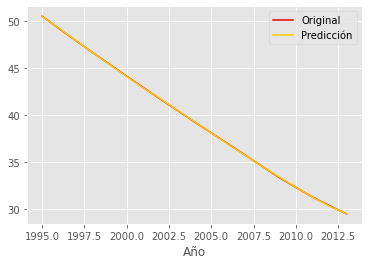

In [33]:
sns.lineplot( data=fin_t ,style = "Id", palette = "hot", dashes = False)

## Regresión para Latino America e islas del Caribe

In [34]:
REG_LCN_95_13=Reg_LCN
REG_LCN_95_13=REG_LCN_95_13[REG_LCN_95_13.index<2014 ]
REG_LCN_95_13=REG_LCN_95_13[REG_LCN_95_13.index>1994 ]
REG_LCN_95_13['Year']=REG_LCN_95_13.index #esto es para poder usarlo en la regresión
REG_LCN_95_13.rename(columns = {'SP.DYN.TFRT.IN':'FERT', 'SP.DYN.IMRT.IN':'MORTINF', 'SH.STA.ACSN':'DREN','Year':'Año','SH.H2O.SAFE.ZS':'H2O','SP.DYN.AMRT.FE':'MORTFEM','SP.DYN.AMRT.MA':'MORTFMAS','NY.GNP.PCAP.CD':'ING','SE.SEC.ENRL.FE.ZS':'SECFEM','SH.XPD.PCAP':'SALUD',}, inplace = True)
REG_LCN_95_13

IndicatorCode,ING,SECFEM,H2O,DREN,SALUD,MORTFEM,MORTFMAS,MORTINF,FERT,Año
Year,,,,,,,,,,
1995,3588.841357,51.262180,87.381226,71.097764,242.640523,128.243772,230.593279,34.551755,2.874889,1995
1996,3913.654234,51.044472,87.840994,71.785434,258.712160,125.596068,226.677843,32.872348,2.822078,1996
1997,4192.085860,51.063469,88.283307,72.541108,279.741258,122.957683,222.782657,31.218780,2.773692,1997
1998,4161.860515,51.052979,88.702868,73.220158,277.589664,120.553874,219.677131,29.663919,2.727521,1998
1999,3959.720344,50.995731,89.152820,73.939450,255.142576,118.144640,216.566195,28.093660,2.682330,1999
2000,4040.184912,50.966930,89.606301,74.650664,271.647256,115.727755,213.443220,26.587966,2.636825,2000
2001,3932.739567,50.956081,89.987097,75.285381,266.515747,113.300669,210.299509,25.228854,2.587930,2001
2002,3676.069372,50.959148,90.354382,75.923881,225.653100,110.873692,207.156530,23.971358,2.537954,2002
2003,3670.341779,51.188492,90.729036,76.568977,232.671896,109.185541,204.304637,22.759106,2.487008,2003


In [35]:
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = REG_LCN_95_13['MORTINF']
X = REG_LCN_95_13.drop(['MORTINF'],axis=1)
k = 9
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 9 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 9 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

<ipython-input-35-1e79434a662c>:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


In [36]:
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_max.head(4))

,numb_features,RSS,R_squared,features
5,1,6.710797,0.989260,"(MORTFEM,)"
14,2,0.943710,0.998490,"(ING, MORTFMAS)"
71,3,0.538380,0.999138,"(ING, MORTFMAS, Año)"
245,4,0.390283,0.999375,"(DREN, SALUD, FERT, Año)"


In [37]:
x4=REG_LCN_95_13[['FERT','Año','DREN','SALUD']]
y4=REG_LCN_95_13['MORTINF']

x4 = sm.add_constant(x4) # adding a constant
 
model4 = sm.OLS(y4, x4).fit()
predictions = model4.predict(x4) 
 
print_model4 = model4.summary()
print(print_model4)
print(model4.params)

                            OLS Regression Results                            
Dep. Variable:                MORTINF   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5600.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           2.96e-22
Time:                        14:15:08   Log-Likelihood:                 9.9507
No. Observations:                  19   AIC:                            -9.901
Df Residuals:                      14   BIC:                            -5.179
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4746.2038    762.533     -6.224      0.0

C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [38]:

df = pd.read_html(model4.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=df['coef'].values[0]
b=df['coef'].values[1]
c=df['coef'].values[2]
d=df['coef'].values[3]
e=df['coef'].values[4]
print("Ecuación de Prediccion es:",a,"+",b,"Fertilidad +",c,"Año",d,"Drenaje +",e,"Gasto en salud")


Ecuación de Prediccion es: -4746.2038 + 9.594 Fertilidad + 2.5681 Año -5.2207 Drenaje + 0.0037 Gasto en salud


In [39]:
unos=['Original', 'Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original']
dos=['Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción','Predicción','Predicción', 'Predicción']
fin1= pd.DataFrame({"Año":REG_LCN_95_13['Año'], "Mort_Inf":REG_LCN_95_13['MORTINF'],"Id":unos})
fin2= pd.DataFrame({"Año":REG_LCN_95_13['Año'], "Mort_Inf":predictions,"Id":dos})
fin=pd.concat([fin1,fin2],ignore_index=True)
fin_t = fin.pivot("Año","Id","Mort_Inf")
fin_t

Id,Original,Predicción
Año,,
1995,34.551755,34.432810
1996,32.872348,32.963961
1997,31.218780,31.201018
1998,29.663919,29.772999
1999,28.093660,28.068686
2000,26.587966,26.548632
2001,25.228854,25.314831
2002,23.971358,23.917801
2003,22.759106,22.655401


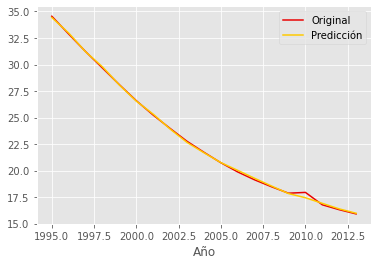

In [40]:
sns.lineplot( data=fin_t ,style = "Id", palette = "hot", dashes = False)

## Regresión para el Africa central y del este

In [41]:
REG_MEA_95_13=Reg_MEA
REG_MEA_95_13=REG_MEA_95_13[REG_MEA_95_13.index<2014 ]
REG_MEA_95_13=REG_MEA_95_13[REG_MEA_95_13.index>1994 ]
REG_MEA_95_13['Year']=REG_MEA_95_13.index #esto es para poder usarlo en la regresión
REG_MEA_95_13.rename(columns = {'SP.DYN.TFRT.IN':'FERT', 'SP.DYN.IMRT.IN':'MORTINF', 'SH.STA.ACSN':'DREN','Year':'Año','SH.H2O.SAFE.ZS':'H2O','SP.DYN.AMRT.FE':'MORTFEM','SP.DYN.AMRT.MA':'MORTFMAS','NY.GNP.PCAP.CD':'ING','SE.SEC.ENRL.FE.ZS':'SECFEM','SH.XPD.PCAP':'SALUD',}, inplace = True)
REG_MEA_95_13

IndicatorCode,ING,SECFEM,H2O,DREN,SALUD,MORTFEM,MORTFMAS,MORTINF,FERT,Año
Year,,,,,,,,,,
1995,2407.990667,44.372681,88.078437,75.805769,116.460515,137.996596,188.690021,41.592604,3.916298,1995
1996,2617.360043,44.767071,88.275012,76.598107,119.917339,135.087040,185.488560,40.021536,3.742383,1996
1997,2749.323233,45.288700,88.402736,77.488563,130.428286,132.146076,182.360144,38.498872,3.583213,1997
1998,2738.208819,45.751411,88.569076,78.378702,136.019191,129.843112,180.158250,37.013726,3.437295,1998
1999,2700.906542,46.212860,88.722419,79.214628,151.223379,127.579471,177.789399,35.584471,3.306156,1999
2000,2829.616949,46.495380,88.886259,80.055000,171.306748,125.265565,175.633918,34.193417,3.196705,2000
2001,2916.976116,46.619820,89.030933,80.924586,187.864011,122.995633,173.291696,32.856679,3.102635,2001
2002,2916.629773,46.775360,89.490941,81.719096,145.154610,120.747251,171.010637,31.552671,3.023295,2002
2003,3135.680266,46.963520,89.639843,82.548420,148.475374,118.470663,169.787118,30.337541,2.963346,2003


In [42]:
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = REG_MEA_95_13['MORTINF']
X = REG_MEA_95_13.drop(['MORTINF'],axis=1)
k = 9
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 9 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 9 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

<ipython-input-42-cd3b503e2c7a>:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


In [43]:
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_max.head(4))

,numb_features,RSS,R_squared,features
3,1,8.844663,0.988566,"(DREN,)"
23,2,0.454920,0.999412,"(SECFEM, Año)"
128,3,0.294344,0.999619,"(MORTFMAS, FERT, Año)"
229,4,0.071039,0.999908,"(H2O, DREN, FERT, Año)"


In [44]:
x4=REG_MEA_95_13[['FERT','Año','DREN','H2O']]
y4=REG_MEA_95_13['MORTINF']

x4 = sm.add_constant(x4) # adding a constant
 
model4 = sm.OLS(y4, x4).fit()
predictions = model4.predict(x4) 
 
print_model4 = model4.summary()
print(print_model4)
print(model4.params)

                            OLS Regression Results                            
Dep. Variable:                MORTINF   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.811e+04
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           4.41e-28
Time:                        14:15:17   Log-Likelihood:                 26.135
No. Observations:                  19   AIC:                            -42.27
Df Residuals:                      14   BIC:                            -37.55
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1345.1226     94.973     14.163      0.0

C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [45]:
df = pd.read_html(model4.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=df['coef'].values[0]
b=df['coef'].values[1]
c=df['coef'].values[2]
d=df['coef'].values[3]
e=df['coef'].values[4]
print("Ecuación de Prediccion es:",a,"+",b,"Fertilidad",c,"Año",d,"Drenaje +",e,"Agua Potable")

Ecuación de Prediccion es: 1345.1226 + 3.3267 Fertilidad -0.6641 Año -0.5374 Drenaje + 0.5569 Agua Potable


In [46]:
unos=['Original', 'Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original']
dos=['Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción','Predicción','Predicción', 'Predicción']
fin1= pd.DataFrame({"Año":REG_MEA_95_13['Año'], "Mort_Inf":REG_MEA_95_13['MORTINF'],"Id":unos})
fin2= pd.DataFrame({"Año":REG_MEA_95_13['Año'], "Mort_Inf":predictions,"Id":dos})
fin=pd.concat([fin1,fin2],ignore_index=True)
fin_t = fin.pivot("Año","Id","Mort_Inf")
fin_t

Id,Original,Predicción
Año,,
1995,41.592604,41.647991
1996,40.021536,40.089048
1997,38.498872,38.488090
1998,37.013726,36.952892
1999,35.584471,35.488754
2000,34.193417,34.100223
2001,32.856679,32.736488
2002,31.552671,31.637713
2003,30.337541,30.411478


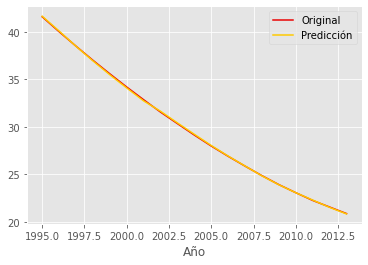

In [47]:
sns.lineplot( data=fin_t ,style = "Id", palette = "hot", dashes = False)

## Regresión Sur de Asia

In [48]:
REG_SAS_95_13=Reg_SAS
REG_SAS_95_13=REG_SAS_95_13[REG_SAS_95_13.index<2014 ]
REG_SAS_95_13=REG_SAS_95_13[REG_SAS_95_13.index>1994 ]
REG_SAS_95_13['Year']=REG_SAS_95_13.index #esto es para poder usarlo en la regresión
REG_SAS_95_13.rename(columns = {'SP.DYN.TFRT.IN':'FERT', 'SP.DYN.IMRT.IN':'MORTINF', 'SH.STA.ACSN':'DREN','Year':'Año','SH.H2O.SAFE.ZS':'H2O','SP.DYN.AMRT.FE':'MORTFEM','SP.DYN.AMRT.MA':'MORTFMAS','NY.GNP.PCAP.CD':'ING','SE.SEC.ENRL.FE.ZS':'SECFEM','SH.XPD.PCAP':'SALUD',}, inplace = True)
REG_SAS_95_13

IndicatorCode,ING,SECFEM,H2O,DREN,SALUD,MORTFEM,MORTFMAS,MORTINF,FERT,Año
Year,,,,,,,,,,
1995,381.552863,37.752258,75.612244,23.960456,15.579677,207.015551,254.040162,80.1,3.851121,1995
1996,413.330478,38.141521,76.518764,24.975443,15.733407,202.639796,251.032092,77.9,3.772195,1996
1997,421.583140,38.953350,77.422629,26.072668,17.434299,198.254774,248.014240,75.5,3.694125,1997
1998,422.999204,39.709770,78.350027,27.168761,17.656116,195.114042,245.315546,73.3,3.616244,1998
1999,443.406705,40.440922,79.261579,28.181798,17.545773,191.969530,242.624513,71.0,3.538222,1999
2000,451.082749,40.771271,80.169355,29.282817,18.564761,188.847758,239.943547,68.8,3.460529,2000
2001,458.926984,41.130779,80.984293,30.357701,19.467011,185.766718,237.293858,66.6,3.384316,2001
2002,465.494690,41.929039,81.881658,31.449158,19.831736,182.662808,234.657781,64.4,3.308916,2002
2003,519.794073,43.472401,82.774983,32.533759,22.121148,179.631409,232.277457,62.3,3.235542,2003


In [49]:
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = REG_SAS_95_13['MORTINF']
X = REG_SAS_95_13.drop(['MORTINF'],axis=1)
k = 9
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 9 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 9 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

<ipython-input-49-3616852244ff>:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


In [50]:
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_max.head(6))

,numb_features,RSS,R_squared,features
6,1,0.748694,0.999660,"(MORTFMAS,)"
10,2,0.260592,0.999882,"(ING, H2O)"
70,3,0.172901,0.999921,"(ING, MORTFMAS, FERT)"
172,4,0.137421,0.999938,"(ING, DREN, MORTFMAS, FERT)"
306,5,0.123586,0.999944,"(ING, H2O, MORTFEM, MORTFMAS, FERT)"
430,6,0.120237,0.999945,"(ING, H2O, MORTFEM, MORTFMAS, FERT, Año)"


In [51]:
x4=REG_SAS_95_13[['FERT','ING','MORTFMAS','Año','H2O','MORTFEM']]
y4=REG_SAS_95_13['MORTINF']

x4 = sm.add_constant(x4) # adding a constant
 
model4 = sm.OLS(y4, x4-1).fit()
predictions = model4.predict(x4) 
 
print_model4 = model4.summary()
print(print_model4)
print(model4.params)

C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


                                 OLS Regression Results                                
Dep. Variable:                MORTINF   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.277e+06
Date:                Wed, 02 Dec 2020   Prob (F-statistic):                    9.90e-37
Time:                        14:15:25   Log-Likelihood:                          20.795
No. Observations:                  19   AIC:                                     -29.59
Df Residuals:                      13   BIC:                                     -23.92
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [52]:
df = pd.read_html(model4.summary().tables[1].as_html(),header=0,index_col=0)[0]
b=df['coef'].values[1]
c=df['coef'].values[2]
d=df['coef'].values[3]
e=df['coef'].values[4]
f=df['coef'].values[5]
g=df['coef'].values[6]
print("Ecuación de Prediccion es:",b,"Fertilidad +",c,"Ingreso Glob +",d,"Mort másculina +",e,"Año",f,"Agua Potable",g,"Mort Femenina")

Ecuación de Prediccion es: 6.9984 Fertilidad + 0.0028 Ingreso Glob + 0.233 Mort másculina + 0.0602 Año -1.4777 Agua Potable -0.0469 Mort Femenina


In [53]:
unos=['Original', 'Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original']
dos=['Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción','Predicción','Predicción', 'Predicción']
fin1= pd.DataFrame({"Año":REG_SAS_95_13['Año'], "Mort_Inf":REG_SAS_95_13['MORTINF'],"Id":unos})
fin2= pd.DataFrame({"Año":REG_SAS_95_13['Año'], "Mort_Inf":predictions,"Id":dos})
fin=pd.concat([fin1,fin2],ignore_index=True)
fin_t = fin.pivot("Año","Id","Mort_Inf")
fin_t

Id,Original,Predicción
Año,,
1995,80.1,85.886510
1996,77.9,83.648450
1997,75.5,81.352196
1998,73.3,79.019272
1999,71.0,76.764242
2000,68.8,74.482504
2001,66.6,72.354170
2002,64.4,70.110372
2003,62.3,68.077364


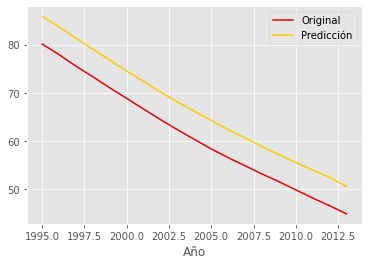

In [54]:
sns.lineplot( data=fin_t ,style = "Id", palette = "hot", dashes = False)

## Regresión Africa sub-sahara y sur

In [55]:
REG_SSF_95_13=Reg_SSF
REG_SSF_95_13=REG_SSF_95_13[REG_SSF_95_13.index<2014 ]
REG_SSF_95_13=REG_SSF_95_13[REG_SSF_95_13.index>1994 ]
REG_SSF_95_13['Year']=REG_SSF_95_13.index #esto es para poder usarlo en la regresión
REG_SSF_95_13.rename(columns = {'SP.DYN.TFRT.IN':'FERT', 'SP.DYN.IMRT.IN':'MORTINF', 'SH.STA.ACSN':'DREN','Year':'Año','SH.H2O.SAFE.ZS':'H2O','SP.DYN.AMRT.FE':'MORTFEM','SP.DYN.AMRT.MA':'MORTFMAS','NY.GNP.PCAP.CD':'ING','SE.SEC.ENRL.FE.ZS':'SECFEM','SH.XPD.PCAP':'SALUD',}, inplace = True)
REG_SSF_95_13

IndicatorCode,ING,SECFEM,H2O,DREN,SALUD,MORTFEM,MORTFMAS,MORTINF,FERT,Año
Year,,,,,,,,,,
1995,539.507759,44.375889,50.405955,24.116136,38.091908,358.787219,411.298375,103.975350,6.049806,1995
1996,559.322445,44.566990,51.238951,24.257876,41.569965,365.390636,415.574056,102.459050,5.995023,1996
1997,573.446738,44.695850,52.144155,24.512594,42.817194,372.012783,419.932260,100.846304,5.942039,1997
1998,535.776361,44.703190,52.990778,24.794475,42.733511,375.970836,421.602958,98.937297,5.891340,1998
1999,517.310296,44.776119,53.814103,25.103018,33.957236,379.934634,423.214091,96.725307,5.842025,1999
2000,503.343493,44.346329,54.657630,25.404157,32.677455,383.851521,424.722527,94.257999,5.792918,2000
2001,490.840974,44.174782,55.497738,25.689868,30.777201,387.734739,426.178479,91.530511,5.743989,2001
2002,487.117087,43.579109,56.315449,25.957868,29.624598,391.446750,427.502576,88.600553,5.695716,2002
2003,529.720328,43.768688,57.121284,26.234885,42.707484,382.508584,418.086863,85.588963,5.645361,2003


In [56]:
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = REG_SSF_95_13['MORTINF']
X = REG_SSF_95_13.drop(['MORTINF'],axis=1)
k = 9
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 9 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 9 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

<ipython-input-56-1ffef4273459>:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


In [57]:
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_max.head(6))

,numb_features,RSS,R_squared,features
3,1,13.128629,0.996695,"(DREN,)"
30,2,6.336935,0.998405,"(DREN, SALUD)"
127,3,0.865840,0.999782,"(MORTFEM, FERT, Año)"
218,4,0.383027,0.999904,"(SECFEM, MORTFEM, FERT, Año)"
288,5,0.307079,0.999923,"(ING, SECFEM, MORTFEM, FERT, Año)"
449,6,0.246086,0.999938,"(SECFEM, H2O, SALUD, MORTFEM, FERT, Año)"


In [58]:
x4=REG_SSF_95_13[['FERT','SECFEM','SALUD','Año','H2O','MORTFEM']]
y4=REG_SSF_95_13['MORTINF']

x4 = sm.add_constant(x4) # adding a constant
 
model4 = sm.OLS(y4, x4).fit()
predictions = model4.predict(x4) 
 
print_model4 = model4.summary()
print(print_model4)
print(model4.params)

                            OLS Regression Results                            
Dep. Variable:                MORTINF   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.228e+04
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.58e-24
Time:                        14:15:34   Log-Likelihood:                 14.332
No. Observations:                  19   AIC:                            -14.66
Df Residuals:                      12   BIC:                            -8.053
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.27e+04   1046.441     12.138      0.0

C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [59]:
df = pd.read_html(model4.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=df['coef'].values[0]
b=df['coef'].values[1]
c=df['coef'].values[2]
d=df['coef'].values[3]
e=df['coef'].values[4]
f=df['coef'].values[5]
g=df['coef'].values[6]
print("Ecuación de Prediccion es:",a,b,"Fertilidad +",c,"Sec Fem +",d,"Gasto Salud",e,"Año +",f,"Agua Potable +",g,"Mort Femenina")

Ecuación de Prediccion es: 12700.0 -53.251 Fertilidad + 0.9092 Sec Fem + 0.0177 Gasto Salud -6.2222 Año + 1.208 Agua Potable + 0.099 Mort Femenina


In [60]:
unos=['Original', 'Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original', 'Original', 'Original','Original', 'Original']
dos=['Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción','Predicción', 'Predicción', 'Predicción', 'Predicción', 'Predicción','Predicción','Predicción', 'Predicción']
fin1= pd.DataFrame({"Año":REG_SSF_95_13['Año'], "Mort_Inf":REG_SSF_95_13['MORTINF'],"Id":unos})
fin2= pd.DataFrame({"Año":REG_SSF_95_13['Año'], "Mort_Inf":predictions,"Id":dos})
fin=pd.concat([fin1,fin2],ignore_index=True)
fin_t = fin.pivot("Año","Id","Mort_Inf")
fin_t

Id,Original,Predicción
Año,,
1995,103.975350,103.934207
1996,102.459050,102.524242
1997,100.846304,101.011537
1998,98.937297,98.908734
1999,96.725307,96.610705
2000,94.257999,93.996731
2001,91.530511,91.589678
2002,88.600553,88.731298
2003,85.588963,85.683119


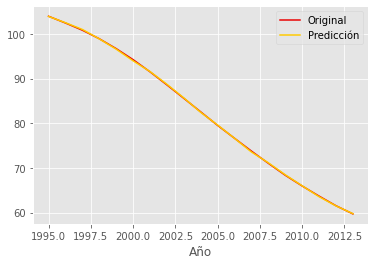

In [61]:
sns.lineplot( data=fin_t ,style = "Id", palette = "hot", dashes = False)